In [1]:
# import necesseary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\nitro 5\Downloads\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


<Axes: >

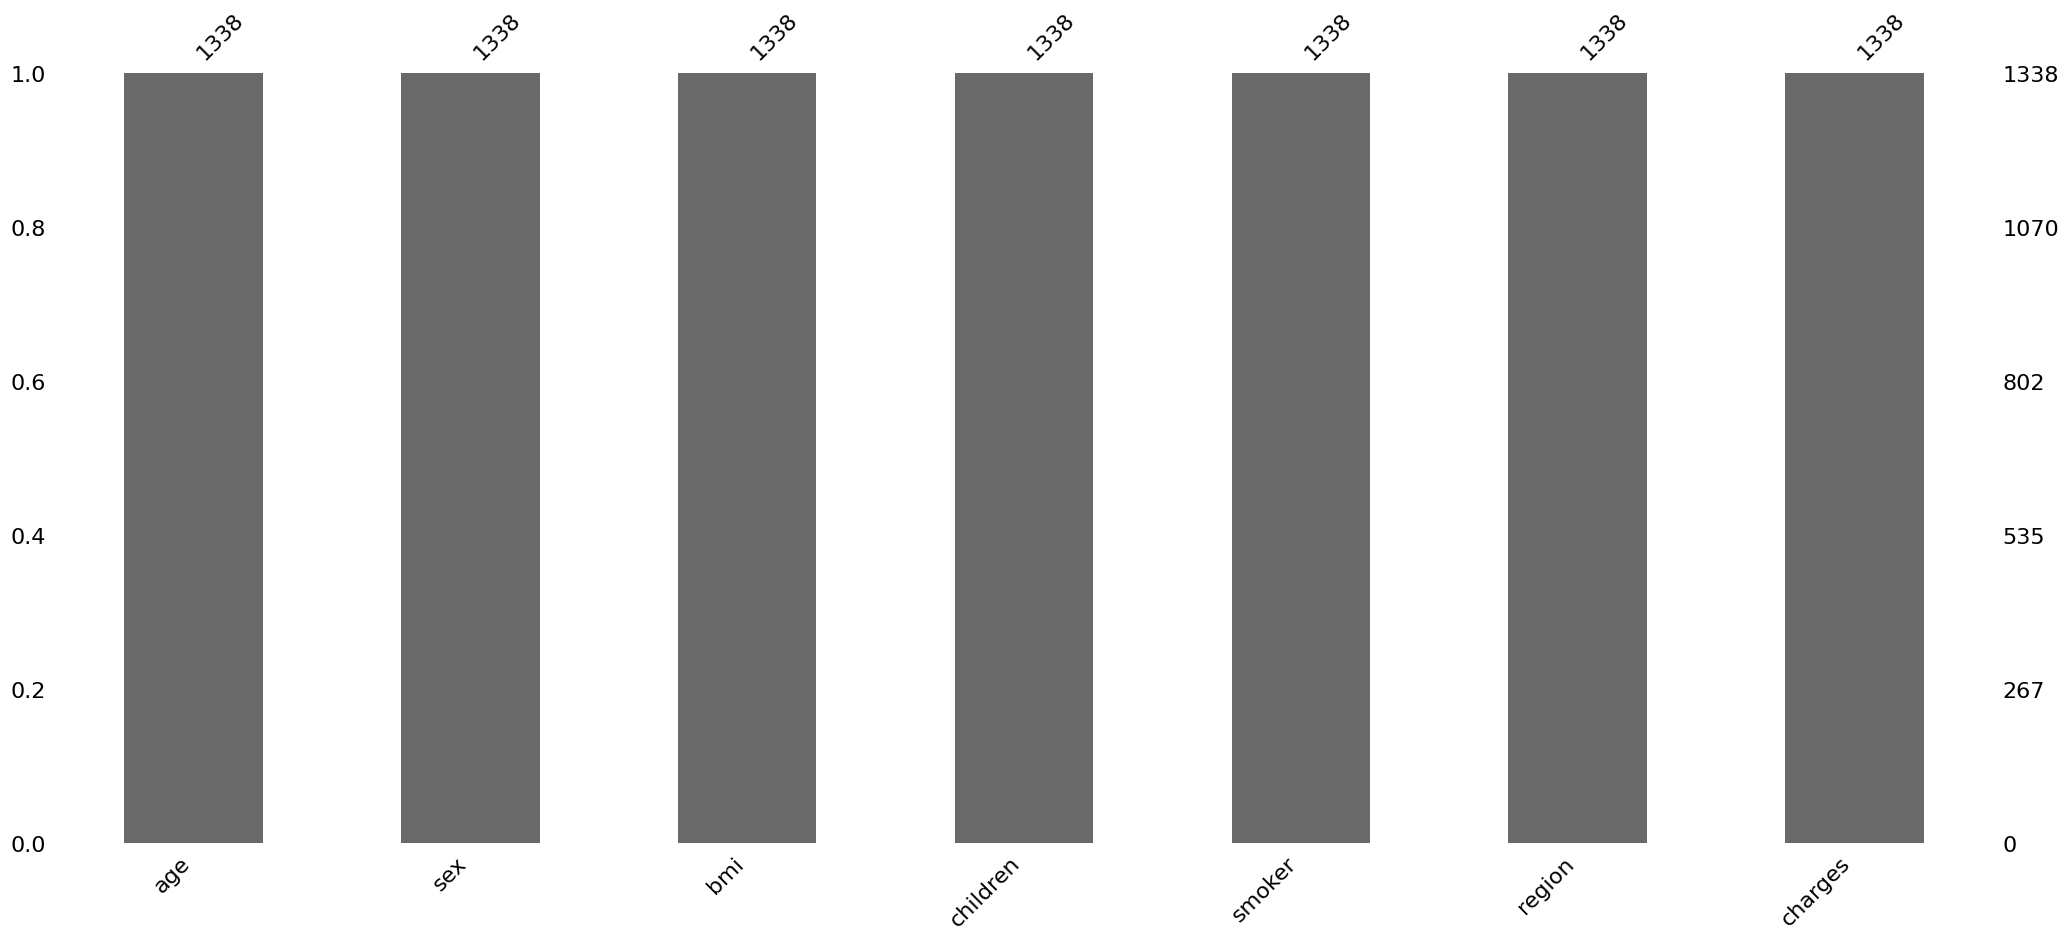

In [8]:
# plot missing data in data frame using missingno package
import missingno as msg
msg.bar(df)

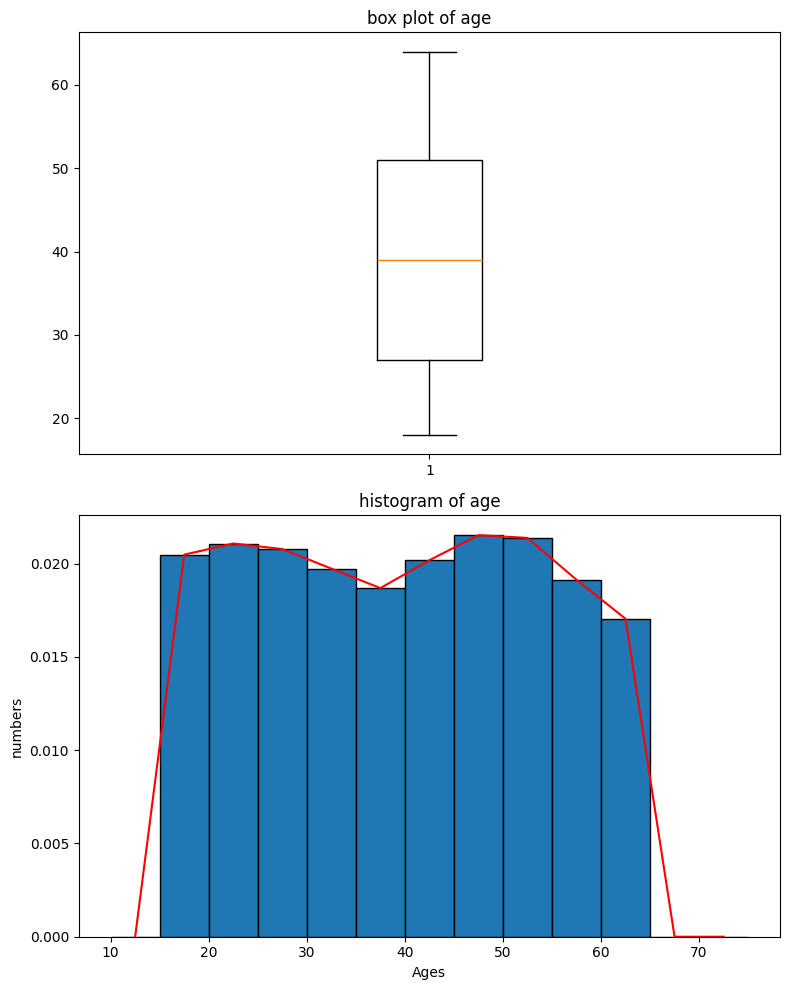

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))

# box plot 
ax1.set_title("box plot of age")
ax1.boxplot(df['age'])
ax2.set_title("histogram of age")

bins = [i for i in range(10, 80, 5)] # customize bins for histogram

#histogram
count, bins, _ = ax2.hist(df['age'], bins=bins, edgecolor='black', density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1]) # find midlle of the each bins for line plot
ax2.plot(bin_centers, count, color='red', linestyle='-') 
ax2.set_xlabel('Ages')
ax2.set_ylabel('numbers')
plt.tight_layout()
plt.show()

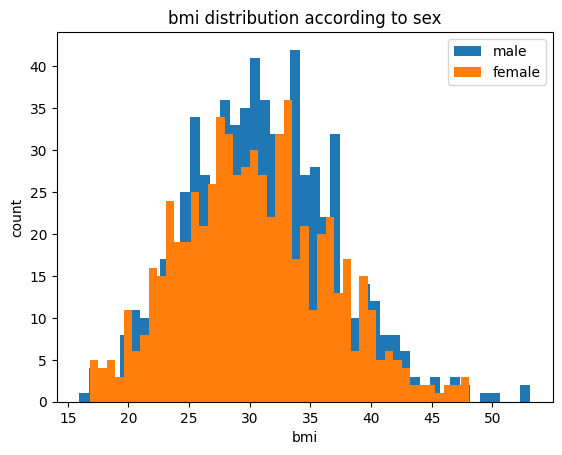

In [10]:
# separate data from according to sex (male, female)
male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']


fig, ax = plt.subplots()
#histogram
ax.hist(male['bmi'], bins=45, label='male')
ax.hist(female['bmi'], bins=45, label='female')
ax.set_xlabel("bmi")
ax.set_ylabel("count")
ax.set_title('bmi distribution according to sex')
ax.legend()
plt.show()

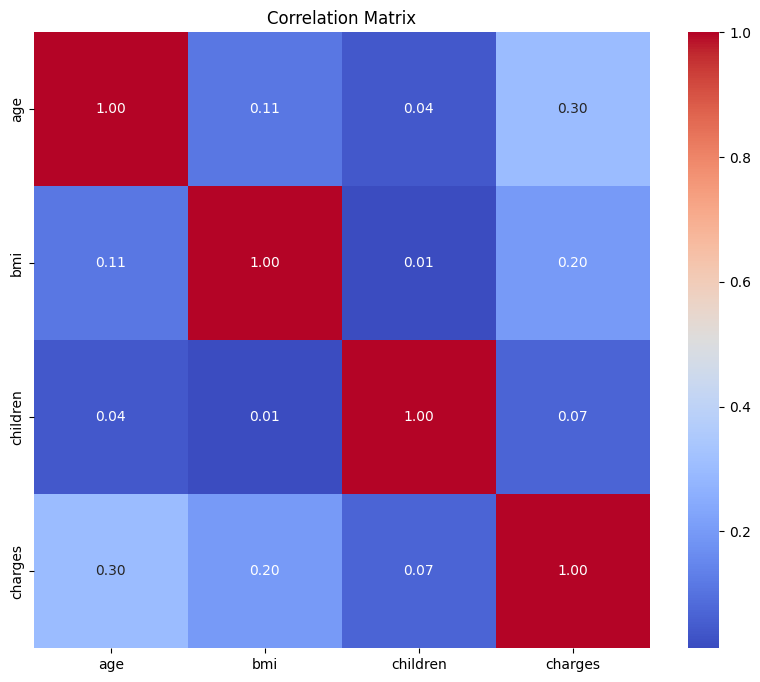

In [11]:
import seaborn as sns

# Calculate the correlation madtrix
corr_df = df.drop(columns=['sex', 'region', 'smoker'])
corrmat = corr_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [12]:
# exchange categorical columns 
df['sex'] = df['sex'].apply(lambda x : 1 if x == "male" else 0)
df['smoker'] = df['smoker'].apply(lambda x : 1 if x == "yes" else 0)

In [13]:
def reigon(x) : # write an function for converting region column
    if x == 'southwest' : 
        return 0
    elif x ==  'southeast' : 
        return 1 
    elif x == 'northwest' : 
        return 2
    elif x == 'northeast' : 
        return 3
    
df['region'] = df['region'].apply(reigon)

C:\Users\nitro 5\AppData\Local\Temp\ipykernel_11508\3998981590.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],ax=axs[0]).set(title='charges distribution-histogram') # before
C:\Users\nitro 5\AppData\Local\Temp\ipykernel_11508\3998981590.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

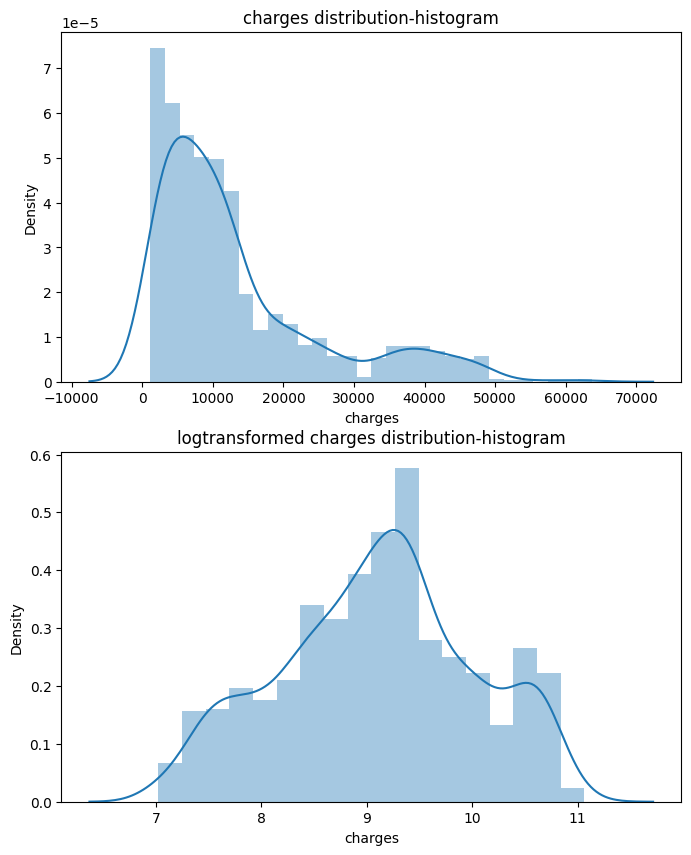

In [14]:
# implement log transformation to 'charges' column
transformed = np.log(df['charges'])

fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.distplot(df['charges'],ax=axs[0]).set(title='charges distribution-histogram') # before
sns.distplot(transformed,ax=axs[1]).set(title='logtransformed charges distribution-histogram') # after
df['charges'] = np.log(df['charges']) # submit changes
fig.show()

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2, random_state = 42)

X_train = train.drop('charges', axis = 1)

X_test = test.drop('charges', axis = 1)

y_train = train['charges']

y_test = test['charges']

In [16]:
print('shape of train data', X_train.shape, y_train.shape)

print('shape of test data', X_test.shape, y_test.shape)

shape of train data (1070, 6) (1070,)
shape of test data (268, 6) (268,)


In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# see parameters of the model
parameter = ['theta_'+str(i) for i in range(df.shape[1])]

X = df.drop('charges',axis = 1)

columns = ['intersect:x_0=1'] + list(X.columns.values)

skl_theta = [lin_reg.intercept_]+list(lin_reg.coef_)

parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':skl_theta})

parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,6.921694
1,theta_1,age,0.034304
2,theta_2,sex,-0.074011
3,theta_3,bmi,0.012831
4,theta_4,children,0.092679
5,theta_5,smoker,1.549078
6,theta_6,region,0.044351


In [19]:
y_pred = lin_reg.predict(X_test)

len(y_pred)

268

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)

print('The Mean Square Error(MSE) is: ',mse)

The Mean Square Error(MSE) is:  0.17756248562721857


In [21]:
R_square = lin_reg.score(X_test,y_test)

print('R square obtain for scikit learn library is :',R_square)

R square obtain for scikit learn library is : 0.8025197916136614
